In [5]:
from ProcessOptimizer.space import constraints
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from ProcessOptimizer.space import Integer, Categorical, Real, Space
from ProcessOptimizer.space.constraints import Constraints, Single, Sum, Conditional, Exclusive, Inclusive
from ProcessOptimizer import plots, gp_minimize
from ProcessOptimizer.plots import plot_objective
from ProcessOptimizer import bokeh_plot, Optimizer
from ProcessOptimizer.space import constraints
import time
import copy

In [7]:
space = Space([[0.0,1.0],[0.0,1.0]])

In [9]:
space

Space([Real(low=0.0, high=1.0, prior='uniform', transform='identity'),
       Real(low=0.0, high=1.0, prior='uniform', transform='identity')])

In [115]:
cons = Constraints(
    [Inclusive(0,[0.2,0.7],'real'),
    Exclusive(1,[0.2,0.7],'real')],
    space
    )

In [116]:
cons.rvs()

[[0.6276843471027154, 0.7378644856281992]]

In [117]:
res = 10
vals = [0.5,0.5]
samples_valid_list = []
for i_dim in range(space.n_dims):
    low = space.dimensions[i_dim].low
    high = space.dimensions[i_dim].high
    x = np.linspace(low,high,res)
    samples_valid = [False]*len(x)
    for i_x in range(len(x)):
        vals_test = vals.copy()
        vals_test[i_dim] = x[i_x]
        samples_valid[i_x] = cons.validate_sample(vals_test)
    samples_valid_list.append(samples_valid)

In [101]:
# Create polygons
x_all = []
y_all = []
polygoing = False
samples_valid = samples_valid_list[0]
x_poly_start = 0
x_poly_end = 0
for i in range(len(x)):
    if not polygoing and not samples_valid[i]: # Start of region
        polygoing = not polygoing
        x_poly_start = x[i]
    elif polygoing and samples_valid[i]:
        polygoing = not polygoing
        x_poly_end = x[i]
        x_all.append([x_poly_start,x_poly_end])
    elif i == len(x)-1 and polygoing:
        x_poly_end = x[i]
        x_all.append([x_poly_start,x_poly_end])
        

In [129]:
res = 10
vals = [0.5,0.1]
poly_all = []
samples_valid_list = []
for i_dim in range(space.n_dims):
    low = space.dimensions[i_dim].low
    high = space.dimensions[i_dim].high
    x = np.linspace(low,high,res)
    samples_valid = [False]*len(x)
    for i_x in range(len(x)):
        vals_test = vals.copy()
        vals_test[i_dim] = x[i_x]
        samples_valid[i_x] = cons.validate_sample(vals_test)
    samples_valid

    x_all = []
    polygoing = False
    x_poly_start = 0
    x_poly_end = 0
    for i in range(len(x)):
        if not polygoing and not samples_valid[i]: # Start of region
            polygoing = not polygoing
            x_poly_start = x[i]
        elif polygoing and samples_valid[i]:
            polygoing = not polygoing
            x_poly_end = x[i]
            x_all.append([x_poly_start,x_poly_end])
        elif i == len(x)-1 and polygoing:
            x_poly_end = x[i]
            x_all.append([x_poly_start,x_poly_end])
    poly_all.append(x_all)

In [131]:
poly_all

[[[0.0, 0.2222222222222222], [0.7777777777777777, 1.0]],
 [[0.2222222222222222, 0.7777777777777777]]]

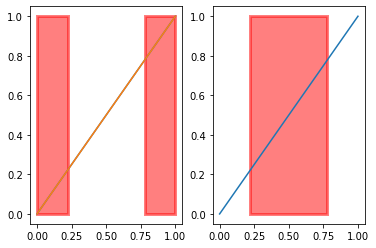

In [134]:
fig,ax = plt.subplots(1,space.n_dims)
yf = [0,1,1,0]
for i in range(space.n_dims):
    x_all = poly_all[i]
    for pols in x_all:
        xf = [pols[0]]*2+[pols[1]]*2
        ax[i].plot(np.linspace(0,1,10),np.linspace(0,1,10))
        ax[i].fill(xf,yf,alpha = 0.5,facecolor='red', edgecolor='red', linewidth=3)

In [133]:
np.linspace(0,1,10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

[0.0, 0.0, 0.2222222222222222, 0.2222222222222222]
[0.7777777777777777, 0.7777777777777777, 1.0, 1.0]


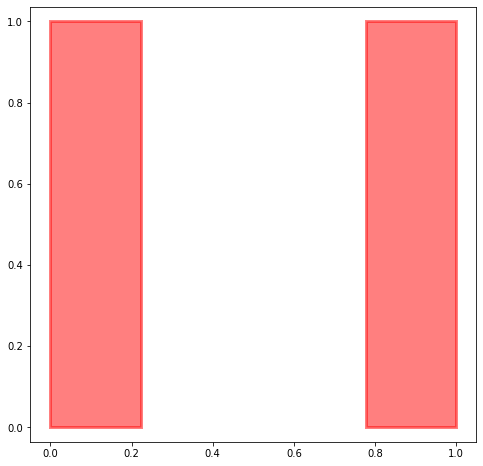

In [108]:
plt.figure(figsize=(8, 8))
plt.axis('equal')
yf = [0,1,1,0]
for pols in x_all:
    xf = [pols[0]]*2+[pols[1]]*2
    print(xf)
    plt.fill(xf,yf,alpha = 0.5,facecolor='red', edgecolor='red', linewidth=3)
plt.show()

In [72]:
samples_valid_list[1]

[True, True, True, True, True, True, True, True, True, True]

In [58]:
a = vals.copy()

In [59]:
vals

[0.5, 0.5]

In [60]:
a[0] = 2

In [61]:
vals

[0.5, 0.5]

In [37]:
space.dimensions[0]

Real(low=0.0, high=1.0, prior='uniform', transform='identity')

In [36]:
np.linspace(1,2,2)

array([1., 2.])